In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

plt.rcParams['font.family'] ='Malgun Gothic'

In [44]:
df=pd.read_excel('./5070_시니어_소비생활.xlsx')
df.sort_values(by='전체',ascending=False,inplace=True)

Text(0.5, 1.0, 'Female')

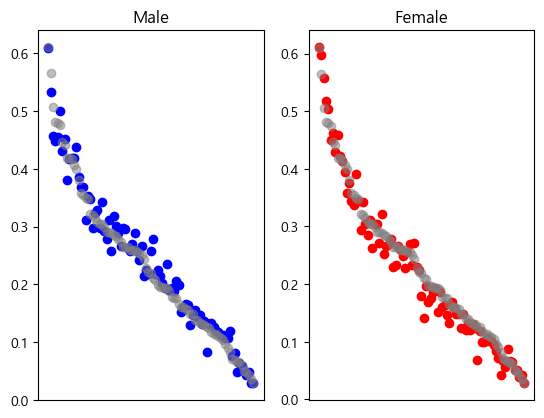

In [45]:
fig=plt.figure()

ax1=fig.add_subplot(1,2,1)
ax1.scatter(np.arange(len(df)),df['남자'],c='b')
ax1.scatter(np.arange(len(df)),df['전체'],c='grey',alpha=0.5)
ax1.set_xticks([])
ax1.set_title('Male')

ax2=fig.add_subplot(1,2,2)
ax2.scatter(np.arange(len(df)),df['여자'],c='r')
ax2.scatter(np.arange(len(df)),df['전체'],c='grey',alpha=0.5)
ax2.set_xticks([])
ax2.set_title('Female')

In [46]:
df2=df.loc[:,['상품','분류','남자']].copy().reset_index().drop('index',axis=1)
m_x=pd.Series(np.arange(len(df2)))
m_y=df2.loc[:,'남자']
m_coord=pd.concat([m_x,m_y],axis=1).to_numpy()

In [47]:
inertia_list=[]

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(m_coord)
    inertia_list.append(kmeans.inertia_)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

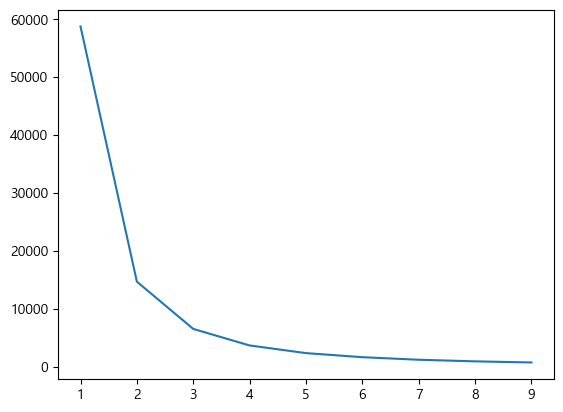

In [48]:
plt.plot(range(1,10),inertia_list)

k=3

In [49]:
kmeans_fr= KMeans(n_clusters=3, random_state=42).fit(m_coord)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


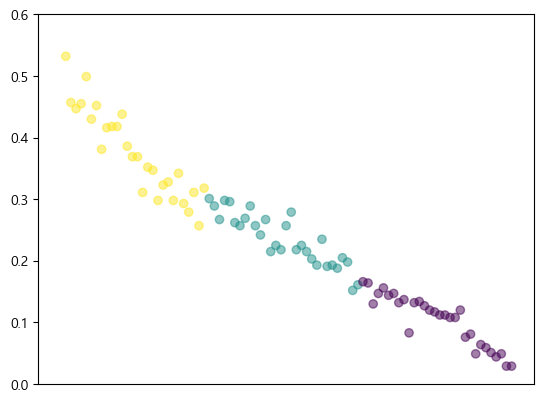

In [50]:
plt.scatter(np.arange(len(df)),df['남자'],alpha=0.5,c=kmeans_fr.labels_)
plt.xticks([])
plt.ylim([0,0.6])

#standard_line=[0.25]*len(df)
#plt.plot(np.arange(len(df)),standard_line,color='grey') #0.348

plt.show()

In [51]:
df['남성_열세']=df['남자']-df['여자']
df_2=df.loc[df['전체']>=0.348].sort_values(by='남자',ascending=False)

m_mean=pd.DataFrame(df_2.groupby('분류')['남자'].mean())
m_num=df_2['분류'].value_counts().rename_axis('분류').to_frame('counts').sort_index()

m_mean['빈도']=m_num
m_mean['기대값']=m_mean['남자']*m_mean['빈도']
m_mean.sort_values(by='기대값',ascending=False,inplace=True)

print(m_mean)

              남자  빈도    기대값
분류                         
고령친화상품  0.438250   4  1.753
의류미용    0.414667   3  1.244
식품외식    0.413333   3  1.240
금융보험    0.493500   2  0.987
주거가전    0.489000   2  0.978
의료건강    0.399500   2  0.799
교통통신여가  0.369000   2  0.738


In [52]:
m_mean['기대값'].describe()

count    7.000000
mean     1.105571
std      0.345405
min      0.738000
25%      0.888500
50%      0.987000
75%      1.242000
max      1.753000
Name: 기대값, dtype: float64

<Axes: xlabel='분류'>

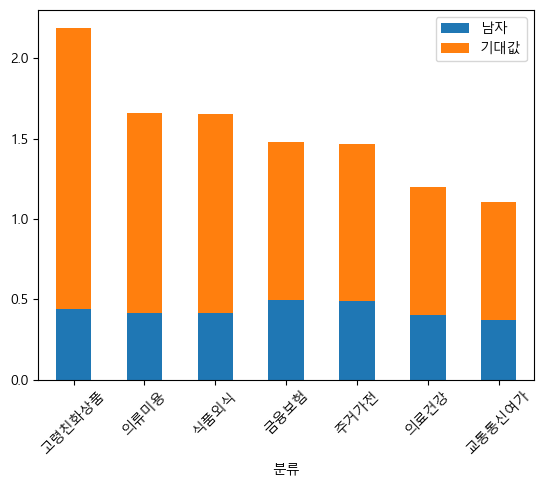

In [53]:
m_mean.loc[:,['남자','기대값']].plot.bar(stacked=True,rot=45)

In [54]:
sr_friendly=df_2.loc[df_2['분류']=='고령친화상품']
meal=df_2.loc[df_2['분류']=='식품외식']
beauty=df_2.loc[df_2['분류']=='의류미용']

male_topic=pd.concat([sr_friendly,meal,beauty],ignore_index=True)
male_topic.sort_values(by='남성_열세',ascending=False,inplace=True)
male_topic

,상품,분류,전체,남자,여자,남성_열세
2,고령친화식품,고령친화상품,0.399,0.438,0.358,0.080
4,건강기능,식품외식,0.475,0.499,0.450,0.049
9,수선서비스,의류미용,0.354,0.369,0.338,0.031
8,외출복,의류미용,0.406,0.418,0.394,0.024
0,요양돌봄서비스,고령친화상품,0.441,0.452,0.430,0.022
3,돌봄로봇,고령친화상품,0.419,0.416,0.422,-0.006
5,배달음식,식품외식,0.446,0.430,0.463,-0.033
1,실버주택,고령친화상품,0.481,0.447,0.517,-0.070
6,즉석간편식,식품외식,0.350,0.311,0.391,-0.080
7,미용서비스,의류미용,0.506,0.457,0.558,-0.101
